# 第19章 马尔可夫链蒙特卡罗法 Markov Chain Monte Carlo Method

1. 蒙特卡罗法是通过基于概率模型的抽样进行数值近似计算的方法，蒙特卡罗法可以用于概率分布的抽样、概率分布数学期望的估计、定积分的近似计算。

随机抽样是蒙特卡罗法的一种应用，有直接抽样法、接受拒绝抽样法等。接受拒绝法的基本想法是，找一个容易抽样的建议分布，其密度函数的数倍大于等于想要抽样的概率分布的密度函数。按照建议分布随机抽样得到样本，再按要抽样的概率分布与建议分布的倍数的比例随机决定接受或拒绝该样本，循环执行以上过程。

马尔可夫链蒙特卡罗法数学期望估计是蒙特卡罗法的另一种应用，按照概率分布$p(x)$抽取随机变量$x$的$n$个独立样本，根据大数定律可知，当样本容量增大时，函数的样本均值以概率1收敛于函数的数学期望
$$\hat { f } _ { n } \rightarrow E _ { p ( x ) } [ {f ( x )} ] , \quad n \rightarrow \infty$$
计算样本均值$\hat { f } _ { n } $，作为数学期望$E _ { p ( x ) } [ {f ( x )} ] $的估计值。

2. 马尔可夫链是具有马尔可夫性的随机过程$$P ( X _ { t } | X _ { 0 } X _ { 1 } \cdots X _ { t - 1 } ) = P ( X _ { t } | X _ { t - 1 } ) , \quad t = 1,2 , \cdots$$
通常考虑时间齐次马尔可夫链。有离散状态马尔可夫链和连续状态马尔可夫链，分别由概率转移矩阵$P$和概率转移核$p(x,y)$定义。

满足$\pi = P \pi$或$\pi ( y ) = \int p ( x , y ) \pi ( x ) d x$的状态分布称为马尔可夫链的平稳分布。

马尔可夫链有不可约性、非周期性、正常返等性质。一个马尔可夫链若是不可约、非周期、正常返的，则该马尔可夫链满足遍历定理。当时间趋于无穷时，马尔可夫链的状态分布趋近于平稳分布，函数的样本平均依概率收敛于该函数的数学期望。
$$\operatorname { lim } _ { t \rightarrow \infty } P ( X _ { t } = i | X _ { 0 } = j ) = \pi _ { i } , \quad i = 1,2 , \cdots ; \quad j = 1,2$$
$$\hat { f } _ { t } \rightarrow E _ { \pi } [ {f ( X )} ] , \quad t \rightarrow \infty$$
可逆马尔可夫链是满足遍历定理的充分条件。

3. 马尔可夫链蒙特卡罗法是以马尔可夫链为概率模型的蒙特卡罗积分方法，其基本想法如下：

（1）在随机变量$x$的状态空间$\chi$上构造一个满足遍历定理条件的马尔可夫链，其平稳分布为目标分布$p(x)$；

（2）由状态空间的某一点$X_0$出发，用所构造的马尔可夫链进行随机游走，产生样本序列$X _ { 1 } , X _ { 2 } , \cdots , X _ { t } , \cdots$；

（3）应用马尔可夫链遍历定理，确定正整数$m$和$n(m<n)$，得到样本集合$\{ x _ { m + 1 } , x _ { m + 2 } , \cdots , x _ { n } \}$，进行函数$f(x)$的均值（遍历均值）估计：
$$\hat { E } f = \frac { 1 } { n - m } \sum _ { i = m + 1 } ^ { n } {f ( x _ { i } )}$$

4. Metropolis-Hastings算法是最基本的马尔可夫链蒙特卡罗法。假设目标是对概率分布$p ( x )$进行抽样，构造建议分布$q ( x , x ^ { \prime } )$，定义接受分布$\alpha ( x , x ^ { \prime } )$进行随机游走，假设当前处于状态$x$，按照建议分布$q ( x , x ^ { \prime } )$机抽样，按照概率$\alpha ( x , x ^ { \prime } )$接受抽样，转移到状态 $x ^ { \prime }$，按照概率$1- \alpha ( x , x ^ { \prime } )$拒绝抽样，停留在状态$x$，持续以上操作，得到一系列样本。这样的随机游走是根据转移核为$p ( x , x ^ { \prime } ) = q ( x , x ^ { \prime } ) \alpha ( x , x ^ { \prime } )$的可逆马尔可夫链（满足遍历定理条件）进行的，其平稳分布就是要抽样的目标分布$p ( x )$。

5. 吉布斯抽样（Gibbs sampling）用于多元联合分布的抽样和估计吉布斯抽样是单分量 Metropolis-Hastings-算法的特殊情况。这时建议分布为满条件概率分布$$q ( x , x ^ { \prime } ) = p ( x _ { j } ^ { \prime } | x _ { - j } )$$
吉布斯抽样的基本做法是，从联合分布定义满条件概率分布，依次从满条件概率分布进行抽样，得到联合分布的随机样本。假设多元联合概率分布为$p ( x ) = p ( x _ { 1 } , x _ { 2 } , \cdots , x _ { k } )$，吉布斯抽样从一个初始样本$x ^ { ( 0 ) } = ( x _ { 1 } ^ { ( 0 ) } , x _ { 2 } ^ { ( 0 ) } , \cdots , x _ { k } ^ { ( 0 ) } ) ^ { T }$出发，不断进行迭代，每一次迭代得到联合分布的一个样本$x ^ { ( i ) } = ( x _ { 1 } ^ { ( i ) } , x _ { 2 } ^ { ( i ) } , \cdots , x _ { k } ^ { ( i ) } ) ^ { T }$，在第$i$次迭代中，依次对第$j$个变量按照满条件概率分布随机抽样$p ( x _ { j } | x _ { 1 } ^ { ( i ) } , \cdots , x _ { j - 1 } ^ { ( i ) },x _ { j + 1 } ^ { ( i - 1 ) } , \cdots , x _ { k } ^ { ( i - 1 ) } ) , j = 1,2 , \cdots , k$，得到$x _ { j } ^ { ( i ) }$最终得到样本序列$\{ x ^ { ( 0 ) } , x ^ { ( 1 ) } , \cdots , x ^ { ( n ) } \}$。

In [1]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np

[[0.23076934 0.30769244 0.4615386 ]]


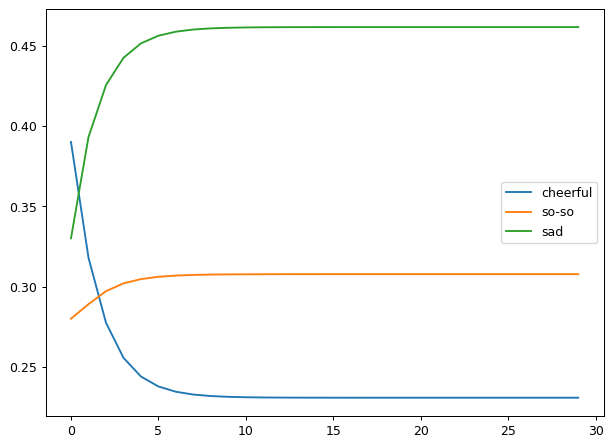

In [2]:
transfer_matrix = np.array([[0.6, 0.2, 0.2], [0.3, 0.4, 0.3], [0, 0.3, 0.7]], dtype='float32')
start_matrix = np.array([[0.5, 0.3, 0.2]], dtype='float32')

value1 = []
value2 = []
value3 = []
for i in range(30):
  start_matrix = np.dot(start_matrix, transfer_matrix)
  value1.append(start_matrix[0][0])
  value2.append(start_matrix[0][1])
  value3.append(start_matrix[0][2])
print(start_matrix)

# visualization
x = np.arange(30)
plt.figure(figsize=(8, 6), dpi=90)
plt.plot(x,value1,label='cheerful')
plt.plot(x,value2,label='so-so')
plt.plot(x,value3,label='sad')
plt.legend()
plt.show()

### M-H采样 python 实现  
### 假设目标平稳分布是一个均值 3，标准差 2 的正态分布，
### 而选择的马尔可夫链状态转移矩阵 $Q(i,j)$ 的条件转移概率是以 $i$ 为均值,方差1的正态分布在位置 $j$ 的


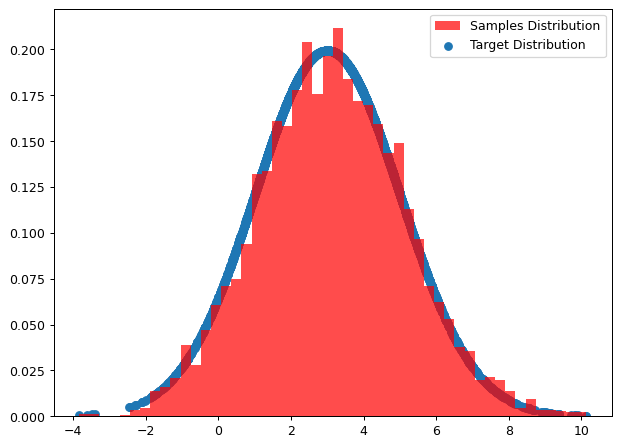

In [3]:
from scipy.stats import norm

def norm_dist_prob(theta):
  y = norm.pdf(theta, loc=3, scale=2)
  return y

T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T - 1:
  t = t + 1
  pi_star = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None)  #状态转移进行随机抽样
  alpha = min(1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t - 1])))  #alpha值
  u = random.uniform(0, 1)
  if u < alpha:
      pi[t] = pi_star[0]
  else:
      pi[t] = pi[t - 1]

plt.figure(figsize=(8, 6), dpi=90)
plt.scatter(pi, norm.pdf(pi, loc=3, scale=2), label='Target Distribution')
num_bins = 50
plt.hist(pi, num_bins, density=1, facecolor='red', alpha=0.7, label='Samples Distribution')
plt.legend()
plt.show()

#### 二维 Gibbs 采样实例 python 实现  

假设我们要采样的是一个二维正态分布 $N(\mu, \Sigma)$ ，其中： $\mu=(\mu_{1}, \mu_{2})= (5, -1)$ , $\Sigma = \begin{pmatrix}
\sigma^{2}_{1} &   \rho \sigma_{1}\sigma_{2}b\rho \sigma_{2}& 
\sigma^{2}_{2}\end{pmatrix} = \begin{pmatrix}
 1& 1b1 & 
4\end{pmatrix}$;

而采样过程中的需要的状态转移条件分布为：

$P(x_{1}|x_{2}) = N(\mu_{1}+ \rho \sigma_{1}/\sigma_{2}(x_{2} - \mu_{2}), (1 - \rho^{2})\sigma^{2}_{1})$

$P(x_{2}|x_{1}) = N(\mu_{2}+ \rho \sigma_{2}/\sigma_{1}(x_{1} - \mu_{1}), (1 - \rho^{2})\sigma^{2}_{2})$

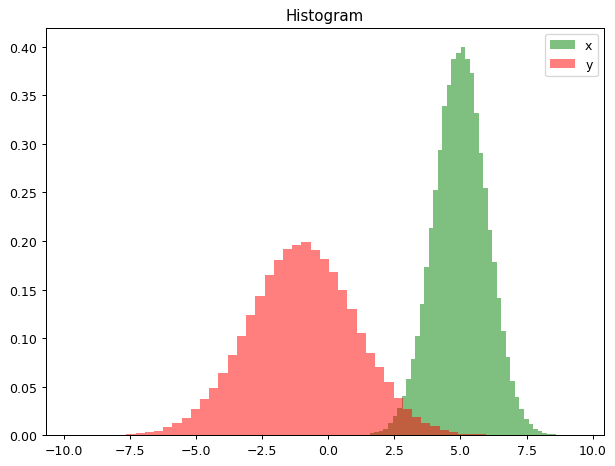

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

samplesource = multivariate_normal(mean=[5,-1], cov=[[1,0.5],[0.5,2]])

def p_ygivenx(x, m1, m2, s1, s2):
  return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt(1 - rho ** 2) * s2))

def p_xgiveny(y, m1, m2, s1, s2):
  return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt(1 - rho ** 2) * s1))

N = 5000
K = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2
rho = 0.5
y = m2

for i in range(N):
  for j in range(K):
    x = p_xgiveny(y, m1, m2, s1, s2)   #y给定得到x的采样
    y = p_ygivenx(x, m1, m2, s1, s2)   #x给定得到y的采样
    z = samplesource.pdf([x,y])
    x_res.append(x)
    y_res.append(y)
    z_res.append(z)

num_bins = 50
plt.figure(figsize=(8, 6), dpi=90)
plt.hist(x_res, num_bins,density=1, facecolor='green', alpha=0.5,label='x')
plt.hist(y_res, num_bins, density=1, facecolor='red', alpha=0.5,label='y')
plt.title('Histogram')
plt.legend()
plt.show()